Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [50]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#### Load the movies dataset 
automobile_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [52]:
automobile_df.drop(columns = ['aspiration', 'engine-location', 'wheel-base', 
'engine-type', 'bore', 'stroke'])

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,two,convertible,rwd,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,two,convertible,rwd,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,two,hatchback,rwd,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26,16500
3,2,164,audi,gas,four,sedan,fwd,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30,13950
4,2,164,audi,gas,four,sedan,4wd,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,four,sedan,rwd,188.8,68.9,55.5,2952,four,141,mpfi,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,four,sedan,rwd,188.8,68.8,55.5,3049,four,141,mpfi,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,four,sedan,rwd,188.8,68.9,55.5,3012,six,173,mpfi,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,four,sedan,rwd,188.8,68.9,55.5,3217,six,145,idi,23.0,106,4800,26,27,22470


#### Remove any duplicate rows

In [53]:
automobile_df.drop_duplicates()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [54]:
automobile_df['price'] = automobile_df['price'].replace('?', np.nan)

In [55]:
automobile_df.dropna()
automobile_df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the price column and the horsepower column into integer format. This will help use the price and horse power variables to manipulate other variables. 

In [56]:
automobile_df['price'] = pd.to_numeric(automobile_df['price'], errors = 'coerce').astype('Int64')
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors = 'coerce').astype('Int64')
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             Int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  Int64
dtype: object

### Finding Certain makes
Locate all vehicles made by Alfa-Romero. 

In [57]:
# Create a dataframe with all the Alfa-Romero vehicles
alfa_romero_df = automobile_df[automobile_df['make'] == 'alfa-romero']
alfa_romero_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive vehicles? 

How do the most expensive and cheapest vehicles compare? Exploring the most expensive vehicles shows the difference prices people are willing to pay for certain vehicles and which brands offer the most expensive vehicles.

     symboling normalized-losses           make fuel-type aspiration  \
74           1                 ?  mercedes-benz       gas        std   
16           0                 ?            bmw       gas        std   
73           0                 ?  mercedes-benz       gas        std   
128          3                 ?        porsche       gas        std   
17           0                 ?            bmw       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
74           two      hardtop          rwd           front       112.0  ...   
16           two        sedan          rwd           front       103.5  ...   
73          four        sedan          rwd           front       120.9  ...   
128          two  convertible          rwd            rear        89.5  ...   
17          four        sedan          rwd           front       110.0  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
74           304

<Axes: xlabel='price', ylabel='make'>

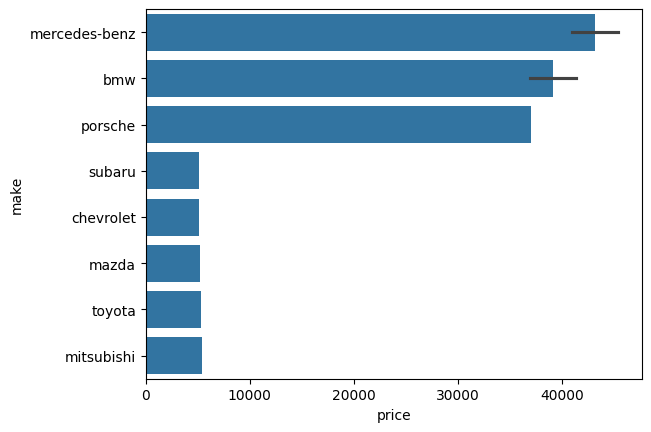

In [58]:
# Select and print top 5 budgeted movies and bottom 5
five_most_expensive = automobile_df.nlargest(5, 'price')
print(five_most_expensive)
five_least_expensive = automobile_df.nsmallest(5, 'price')
print(five_least_expensive)

# Concatenate data
top_and_lowest_five_price = pd.concat([five_most_expensive,five_least_expensive])

# Create barplot with regression
sns.barplot( x = 'price', y = 'make', data = top_and_lowest_five_price)


#### What are the top 5 vehicles by weight to horsepower ratio? 

Compare the min and max weight to horsepower ratio. The comparison helps us identify the vehicles with the best acceleration which is important for some customers needs. Creating a new column called 'power-weight-ratio' using horsepower and curb-weight should assist us in this process. 

     symboling normalized-losses           make fuel-type aspiration  \
49           0                 ?         jaguar       gas        std   
129          1                 ?        porsche       gas        std   
73           0                 ?  mercedes-benz       gas        std   
47           0               145         jaguar       gas        std   
48           0                 ?         jaguar       gas        std   
18           2               121      chevrolet       gas        std   
30           2               137          honda       gas        std   
32           1               101          honda       gas        std   
90           1               128         nissan    diesel        std   
182          2               122     volkswagen    diesel        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
49           two      sedan          rwd           front       102.0  ...   
129          two  hatchback          rwd           fr

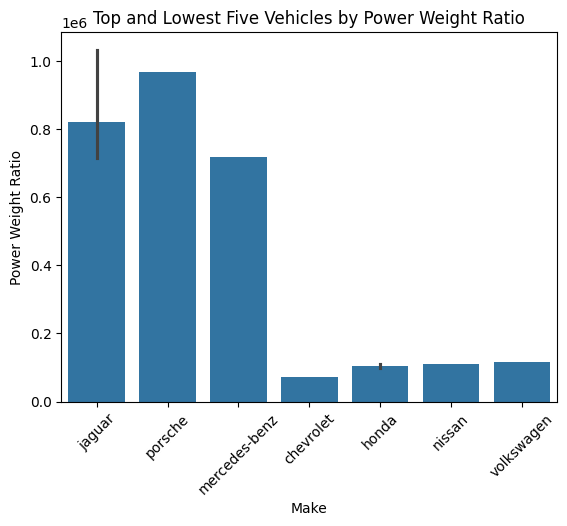

In [59]:
#  Create new column called vehicle volume
automobile_df['power-weight-ratio'] = automobile_df['curb-weight'] * automobile_df['horsepower'] 

# Get the top 5 highest and lowest vehicles by volume
top_five = automobile_df.nlargest(5, 'power-weight-ratio')
bottom_five = automobile_df.nsmallest(5, 'power-weight-ratio')

# Combine the two DataFrames
top_and_lowest_five= pd.concat([top_five, bottom_five])
print(top_and_lowest_five)

#  Create a barplot
sns.barplot(x = 'make', y = 'power-weight-ratio', data = top_and_lowest_five)
plt.xticks(rotation=45)
plt.title('Top and Lowest Five Vehicles by Power Weight Ratio')
plt.xlabel('Make')
plt.ylabel('Power Weight Ratio')
plt.show()


#### Find the heaviest vehicles. 
Sort the dataframe based on the curb weight column.

In [60]:
# Sort automobiles by weight
weight_sorted_df = automobile_df.sort_values(by = 'curb-weight', ascending = False)

weight_sorted_df['curb-weight'].head()

48    4066
47    4066
49    3950
73    3900
70    3770
Name: curb-weight, dtype: int64

#### Find vehicles which have city mpg that is less than 20

In [61]:
filtered_below_twenty = automobile_df[automobile_df['city-mpg'] < 20]
list_of_efficient_vehicles = filtered_below_twenty[['make', 'city-mpg']]
print(list_of_efficient_vehicles[0:11])

           make  city-mpg
2   alfa-romero        19
4          audi        18
5          audi        19
6          audi        19
7          audi        19
8          audi        17
9          audi        16
15          bmw        16
16          bmw        16
17          bmw        15
29        dodge        19


#### Most successful vehciles
Create a bar plot explaining the frequency of vehilces in dataframe.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'toyota'),
  Text(1, 0, 'nissan'),
  Text(2, 0, 'mazda'),
  Text(3, 0, 'mitsubishi'),
  Text(4, 0, 'honda'),
  Text(5, 0, 'volkswagen'),
  Text(6, 0, 'subaru'),
  Text(7, 0, 'peugot'),
  Text(8, 0, 'volvo'),
  Text(9, 0, 'dodge'),
  Text(10, 0, 'mercedes-benz'),
  Text(11, 0, 'bmw'),
  Text(12, 0, 'audi'),
  Text(13, 0, 'plymouth'),
  Text(14, 0, 'saab'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'isuzu'),
  Text(17, 0, 'jaguar'),
  Text(18, 0, 'chevrolet'),
  Text(19, 0, 'alfa-romero'),
  Text(20, 0, 'renault'),
  Text(21, 0, 'mercury')])

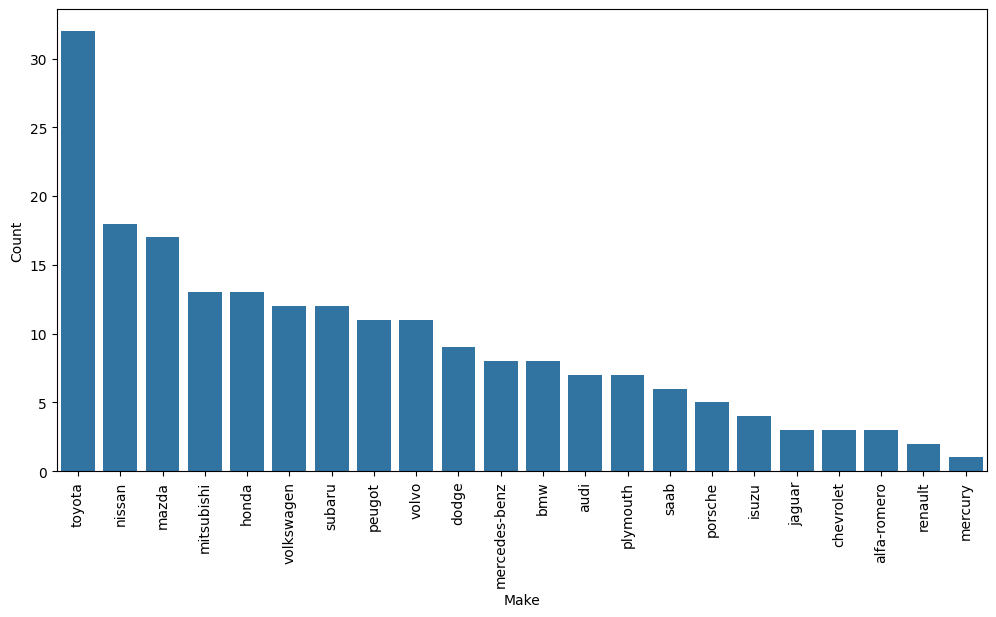

In [62]:

# Get distribution of cars by make
genre_distribution = automobile_df['make'].value_counts().reset_index()
genre_distribution.columns = ['make', 'count']

# Plot the distribution as a bar graph
plt.figure(figsize = (12, 6))
sns.barplot(x = 'make', y = 'count', data = genre_distribution)
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation = 90)

Text(0.5, 0, 'Fuel type')

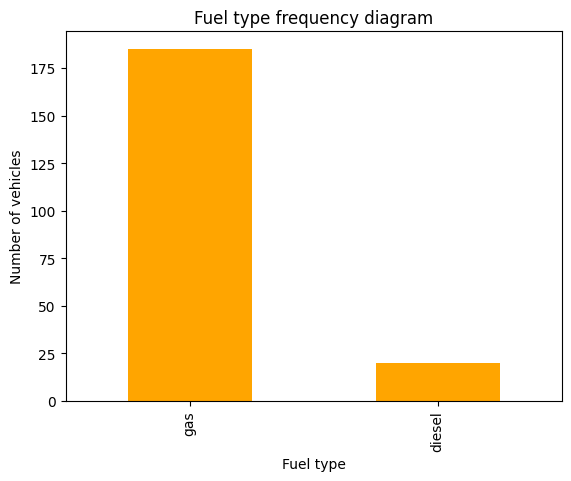

In [63]:
# Generate three different interesting visualisations with a data story.
automobile_df['fuel-type'].value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Fuel type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')


Text(0.5, 0, 'Body-Style')

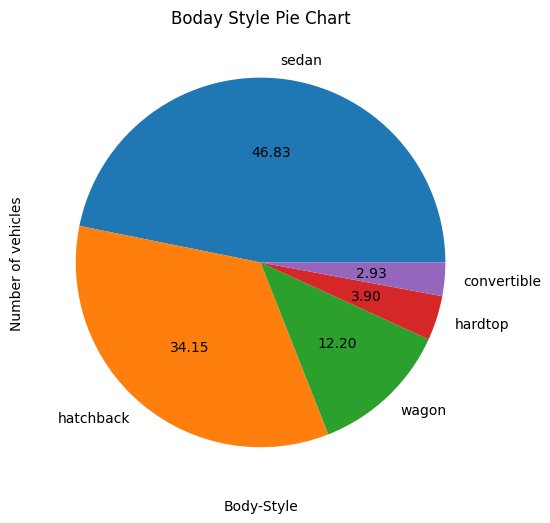

In [64]:
automobile_df['body-style'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Boday Style Pie Chart")
plt.ylabel('Number of vehicles')
plt.xlabel('Body-Style')

Text(0.5, 0, 'Drive wheels')

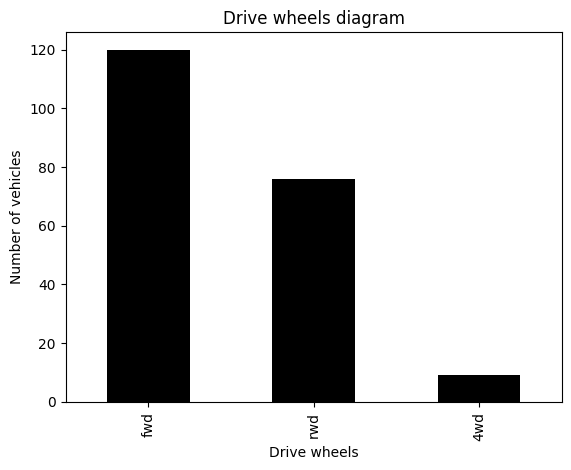

In [65]:
automobile_df['drive-wheels'].value_counts().plot(kind='bar',color='black')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels')